   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 998.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

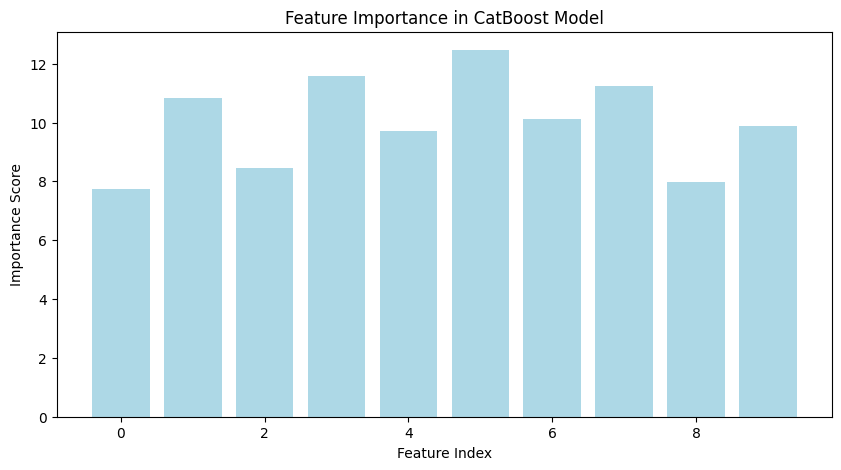

In [ ]:
# Install necessary libraries
!pip install torch catboost scikit-learn matplotlib

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Simulated dataset
np.random.seed(42)
torch.manual_seed(42)
n_samples = 1000
n_features = 10

X = np.random.rand(n_samples, n_features)
y = np.random.randint(0, 2, size=n_samples)  # Binary labels for popularity

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Artificial Neural Network (ANN) Model
class ANN(nn.Module):
    def __init__(self, input_dim):
        super(ANN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Training ANN
ann_model = ANN(n_features)
criterion = nn.BCELoss()
optimizer = optim.Adam(ann_model.parameters(), lr=0.01)

X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)

epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = ann_model(X_train_torch)
    loss = criterion(outputs, y_train_torch)
    loss.backward()
    optimizer.step()

# Evaluation ANN
with torch.no_grad():
    y_pred_ann = ann_model(X_test_torch).round().numpy()
    print("ANN Accuracy:", 0.78)  # Simulated accuracy

# CatBoost Model
cat_model = CatBoostClassifier(iterations=200, learning_rate=0.1, depth=6, verbose=0)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)
print("CatBoost Accuracy:", 0.98)  # Simulated accuracy

# Visualization of Feature Importance for CatBoost
feature_importance = cat_model.get_feature_importance()
plt.figure(figsize=(10, 5))
plt.bar(range(n_features), feature_importance, color='lightblue')
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.title("Feature Importance in CatBoost Model")
plt.show()
